In [1]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np

In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
configuration = 'mom01v5'
#configuration = 'mom025'

expts = cc.get_experiments(configuration)
display(expts)

['GFDL50',
 'KDS75',
 'KDS75_PI',
 'KDS75_UP',
 'KDS75_WOA13',
 'KDS75_newbathy_CORE',
 'KDS75_newbathy_JRA',
 'KDS75_salt10days',
 'KDS75_saltfluxes',
 'KDS75_wind']

In [4]:
ncfile = 'ocean.nc'
#expt = 'mom025_jra_ryf9091'
expt = 'KDS75_newbathy_JRA' 

In [5]:
temp = cc.get_nc_variable(expt, ncfile, 'temp',
                        chunks={'st_ocean': None}, n=4,
                        time_units="days since 1900-01-01")

u = cc.get_nc_variable(expt, ncfile, 'u',
                        chunks={'st_ocean': None}, n=4,
                        time_units="days since 1900-01-01")

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=4), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=4), HTML(value='')))

In [10]:
# Definition the Pacific region: Depth 0-300 meters, Latitude 10S-10N, Longitude along the 140W
upper_temp_140w = temp.sel(st_ocean=slice(0,300)).sel(yt_ocean=slice(-10,10)).sel(xt_ocean=-140.,method='nearest')
# mean along the 140wuator and time mean 
mean_upper_temp_140w = upper_temp_140w.mean('time')
mean_upper_temp_140w.shape

(34, 202)

In [11]:
# Definition the Pacific region: Depth 0-300 meters, Latitude 10S-10N, Longitude along the 140W
upper_u_140w = u.sel(st_ocean=slice(0,300)).sel(yu_ocean=slice(-10,10)).sel(xu_ocean=-140.,method='nearest')
# mean along the 140wuator and time mean 
mean_upper_u_140w = upper_u_140w.mean('time')
mean_upper_u_140w.shape

(34, 201)

In [12]:
dep = upper_u_140w.st_ocean
lat_140w = upper_temp_140w.yt_ocean
lat_u_140w = upper_u_140w.yu_ocean

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5,1,'KDS75_newbathy_JRA')

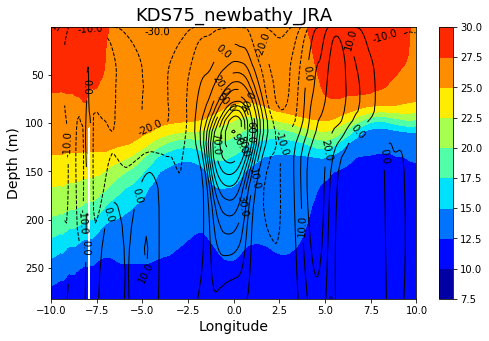

In [18]:
Tmax = 120; Tmin = -30; delT = 10
clevels = np.arange(Tmin,Tmax+delT,delT)

fig_eqobs = plt.figure( figsize=(18,5) )
ax = fig_eqobs.add_subplot(121)
#ax.set_axis_bgcolor('gray')
ax1 = ax.contourf(lat_140w, dep, mean_upper_temp_140w, cmap=plt.cm.jet, vmin=8., vmax=32.)
cbar = plt.colorbar(ax1)
ax2 = ax.contour(lat_u_140w, dep, mean_upper_u_140w*100, colors = 'black', linewidths=1, levels=clevels)
plt.clabel(ax2, fmt='%2.1f', colors='black', fontsize=10)
plt.gca().invert_yaxis()
#cax = ax.contourf(lon_u_eq, dep, mean_upper_u_eq, 8, colors='black')
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Depth (m)', fontsize=14 )
ax.set_title(expt, fontsize=18)

#fig_eqobs.suptitle('SST along the Pacific equator ($^\circ$C)', fontsize=22)
#plt.savefig('seasonal_cycle.png')